In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
# Load the preprocessed customer dataset
csv_file_path = "preprocessed_customer_data.csv"
customer_df = pd.read_csv(csv_file_path)
customer_df.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1000,0.361702,1,0,0.781891,0.08,0
1,1001,0.170213,1,2,0.316323,0.76,1
2,1002,0.957447,1,2,0.264637,0.48,1
3,1003,0.638298,0,2,0.384600,0.52,0
4,1004,0.659574,1,0,0.690592,0.36,0


In [17]:
# Select the features for clustering
features_for_clustering = ["Age", "AnnualIncome (USD)", "TotalPurchases", "Gender", "MaritalStatus", "PreferredCategory"]

# Apply K-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df[features_for_clustering])

# Visualize the clusters based on two principal components (for visualization purposes)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_df[features_for_clustering])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = customer_df['Cluster']

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(customer_df[features_for_clustering])

tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE Component 1', 't-SNE Component 2', 't-SNE Component 3'])
tsne_df['Cluster'] = customer_df['Cluster']


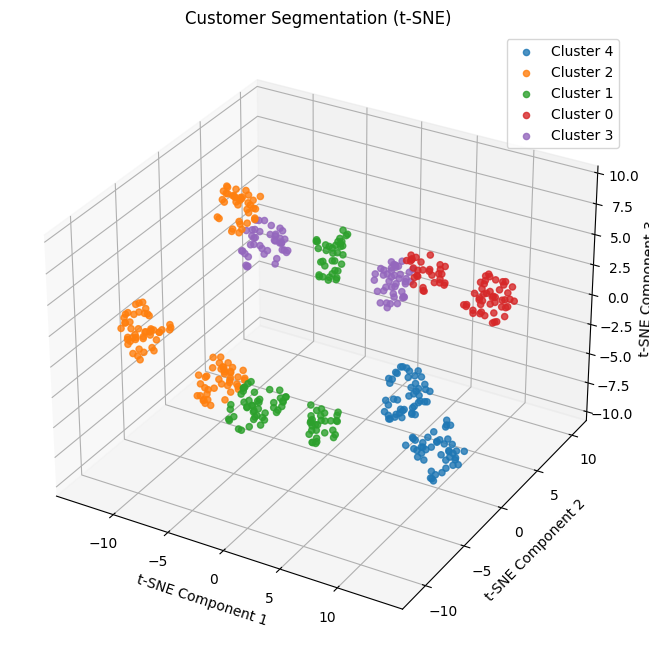

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in tsne_df['Cluster'].unique():
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster_label]
    ax.scatter(cluster_data['t-SNE Component 1'], cluster_data['t-SNE Component 2'], cluster_data['t-SNE Component 3'],
               label=f'Cluster {cluster_label}', alpha=0.8)

ax.set_title('Customer Segmentation (t-SNE)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.show()